## แบบฝึกหัดเขียนโปรแกรมครั้งที่ 6 ตัวจำแนกแบบเบส์

### 4.เขียนโปรแกรมสำหรับสร้างตัวจำแนกเชิงเส้น
ให้ วาดกราฟ likelihood, posterior และขอบตัดสินใจ โดยทำสองรูปแบบ คือ 
- กำหนดค่าพารามิเตอร์ของการแจกแจก 
- สุ่มตัวอย่างเพื่อนำมาคำนวณค่าพารามิเตอร์ของการแจกแจง 

C:\Users\premj\AppData\Local\Temp\ipykernel_15612\56666660.py:46: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, likelihood1, levels=10, cmap='Blues', alpha=0.6, label='Likelihood Class 1')
C:\Users\premj\AppData\Local\Temp\ipykernel_15612\56666660.py:47: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, likelihood2, levels=10, cmap='Reds', alpha=0.6, label='Likelihood Class 2')


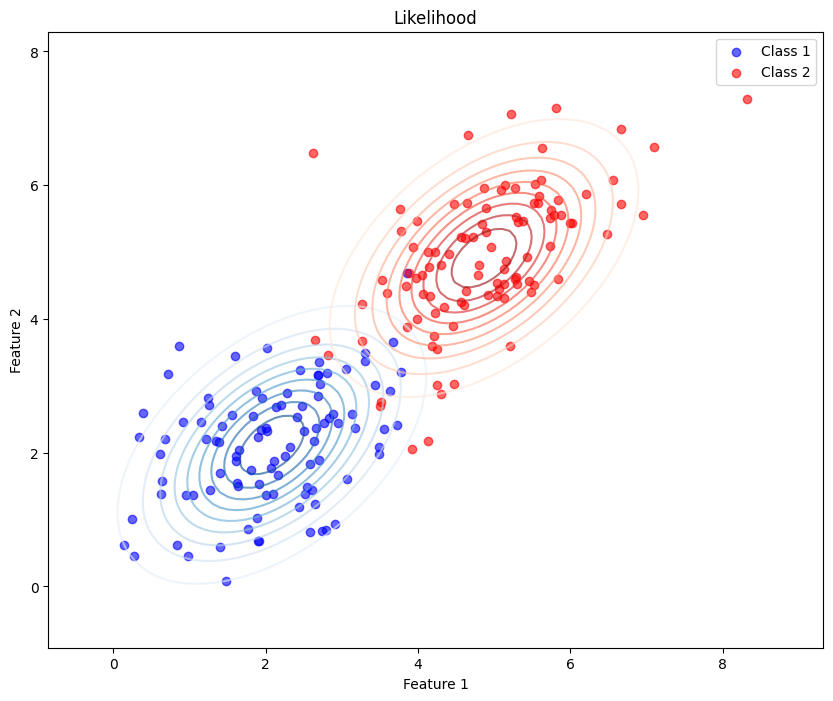

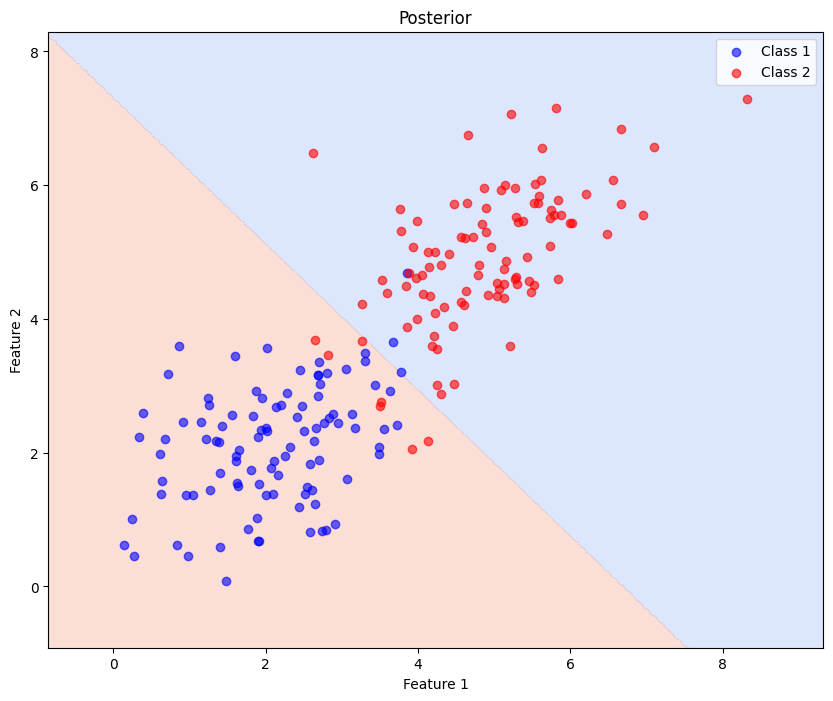

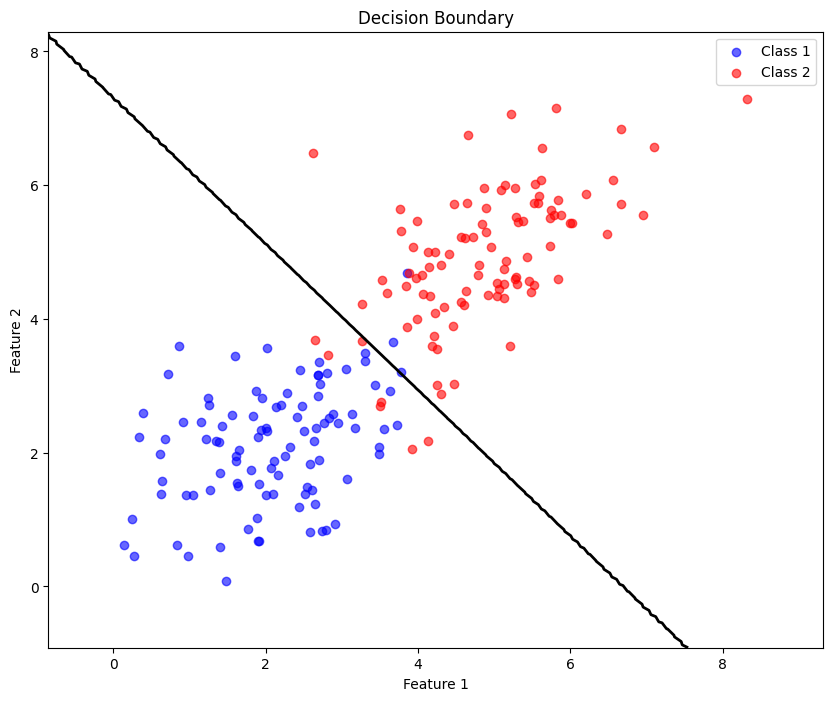

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# สร้างข้อมูลสำหรับ 2 คลาส
def generate_data(n_samples, mu1, mu2, cov, random_state=None):
    if random_state:
        np.random.seed(random_state)
    X1 = np.random.multivariate_normal(mu1, cov, n_samples)
    X2 = np.random.multivariate_normal(mu2, cov, n_samples)
    return X1, X2

# คำนวณค่าเฉลี่ยและโควาเรียนซ์
def lda_fit(X1, X2):
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)
    cov1 = np.cov(X1, rowvar=False)
    cov2 = np.cov(X2, rowvar=False)
    # ใช้ค่า covariance เดียวกัน
    shared_cov = (cov1 + cov2) / 2
    return mu1, mu2, shared_cov

# คำนวณความน่าจะเป็น (likelihood) และ posterior
def lda_predict(x, mu1, mu2, shared_cov, prior1, prior2):
    # คำนวณ likelihood
    likelihood1 = multivariate_normal.pdf(x, mean=mu1, cov=shared_cov)
    likelihood2 = multivariate_normal.pdf(x, mean=mu2, cov=shared_cov)
    # คำนวณ posterior โดยใช้ Bayes' theorem
    posterior1 = likelihood1 * prior1
    posterior2 = likelihood2 * prior2
    return likelihood1, likelihood2, posterior1, posterior2

# วาดกราฟ likelihood
def plot_likelihood(X1, X2, mu1, mu2, shared_cov):
    plt.figure(figsize=(10, 8))
    x_min, x_max = min(X1[:, 0].min(), X2[:, 0].min()) - 1, max(X1[:, 0].max(), X2[:, 0].max()) + 1
    y_min, y_max = min(X1[:, 1].min(), X2[:, 1].min()) - 1, max(X1[:, 1].max(), X2[:, 1].max()) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    likelihood1, likelihood2, _, _ = lda_predict(grid, mu1, mu2, shared_cov, prior1=0.5, prior2=0.5)
    likelihood1 = likelihood1.reshape(xx.shape)
    likelihood2 = likelihood2.reshape(xx.shape)

    # วาด contour สำหรับ likelihood
    plt.contour(xx, yy, likelihood1, levels=10, cmap='Blues', alpha=0.6, label='Likelihood Class 1')
    plt.contour(xx, yy, likelihood2, levels=10, cmap='Reds', alpha=0.6, label='Likelihood Class 2')

    # วาดข้อมูล
    plt.scatter(X1[:, 0], X1[:, 1], label='Class 1', alpha=0.6, color='blue')
    plt.scatter(X2[:, 0], X2[:, 1], label='Class 2', alpha=0.6, color='red')

    plt.title('Likelihood')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# วาดกราฟ posterior
def plot_posterior(X1, X2, mu1, mu2, shared_cov):
    plt.figure(figsize=(10, 8))
    x_min, x_max = min(X1[:, 0].min(), X2[:, 0].min()) - 1, max(X1[:, 0].max(), X2[:, 0].max()) + 1
    y_min, y_max = min(X1[:, 1].min(), X2[:, 1].min()) - 1, max(X1[:, 1].max(), X2[:, 1].max()) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    prior1 = len(X1) / (len(X1) + len(X2))
    prior2 = len(X2) / (len(X1) + len(X2))

    _, _, posterior1, posterior2 = lda_predict(grid, mu1, mu2, shared_cov, prior1, prior2)
    posterior1 = posterior1.reshape(xx.shape)
    posterior2 = posterior2.reshape(xx.shape)

    # วาด contour สำหรับ posterior
    plt.contourf(xx, yy, posterior1 - posterior2, levels=0, cmap='coolwarm', alpha=0.3)

    # วาดข้อมูล
    plt.scatter(X1[:, 0], X1[:, 1], label='Class 1', alpha=0.6, color='blue')
    plt.scatter(X2[:, 0], X2[:, 1], label='Class 2', alpha=0.6, color='red')

    plt.title('Posterior')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# วาดกราฟขอบตัดสินใจ
def plot_decision_boundary(X1, X2, mu1, mu2, shared_cov):
    plt.figure(figsize=(10, 8))
    x_min, x_max = min(X1[:, 0].min(), X2[:, 0].min()) - 1, max(X1[:, 0].max(), X2[:, 0].max()) + 1
    y_min, y_max = min(X1[:, 1].min(), X2[:, 1].min()) - 1, max(X1[:, 1].max(), X2[:, 1].max()) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]

    prior1 = len(X1) / (len(X1) + len(X2))
    prior2 = len(X2) / (len(X1) + len(X2))

    _, _, posterior1, posterior2 = lda_predict(grid, mu1, mu2, shared_cov, prior1, prior2)
    posterior1 = posterior1.reshape(xx.shape)
    posterior2 = posterior2.reshape(xx.shape)

    # วาด contour เส้นขอบตัดสินใจ
    plt.contour(xx, yy, posterior1 - posterior2, levels=[0], colors='k', linewidths=2)

    # วาดข้อมูล
    plt.scatter(X1[:, 0], X1[:, 1], label='Class 1', alpha=0.6, color='blue')
    plt.scatter(X2[:, 0], X2[:, 1], label='Class 2', alpha=0.6, color='red')

    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# กรณีที่ 1: กำหนดค่าพารามิเตอร์ของการแจกแจง
mu1 = [2, 2]
mu2 = [5, 5]
cov = [[1, 0.5], [0.5, 1]] # Covariance เดียวกัน
n_samples = 100

X1, X2 = generate_data(n_samples, mu1, mu2, cov, random_state=42)
mu1_hat, mu2_hat, shared_cov_hat = lda_fit(X1, X2)

# วาดกราฟทั้ง 3 แบบ
plot_likelihood(X1, X2, mu1_hat, mu2_hat, shared_cov_hat)
plot_posterior(X1, X2, mu1_hat, mu2_hat, shared_cov_hat)
plot_decision_boundary(X1, X2, mu1_hat, mu2_hat, shared_cov_hat)
